In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from pycm import ConfusionMatrix, Compare
from Load import * 

c:\Users\limng\Desktop\bt4012 github\bt4012-group13\Load.py:7: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/queried/transactions_{i}.csv')
c:\Users\limng\Desktop\bt4012 github\bt4012-group13\Load.py:7: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/queried/transactions_{i}.csv')


In [4]:
!pip install pycm
!pip install shap


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# df = full_df

In [16]:
# df.info()
# df.head()
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 23276498 entries, 0 to 519576
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   flag                int64 
 1   address from        object
 2   address to          object
 3   timestamp           int64 
 4   amount              object
 5   gasUsed             int64 
 6   contractInteracted  object
dtypes: int64(3), object(4)
memory usage: 1.4+ GB


,flag,address from,address to,timestamp,amount,gasUsed,contractInteracted
0,1,0xc6c198c7e472de4313f2ae9c9b02185dd8d91262,0x000000000532b45f47779fce440748893b257865,1594562749,10000000000000000,21000,NaN
1,1,0x028d61f42f1ca1ad6887f3311a0b1789ef6dadbb,0x000000000532b45f47779fce440748893b257865,1594563733,10000000000000000000,21000,NaN
2,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x000000000532b45f47779fce440748893b257865,1594563793,5000000000000000000,21000,NaN
3,1,0x2c2b7579e86363ccd46d0942f7fe274ccdbae351,0x000000000532b45f47779fce440748893b257865,1594563893,5000000000000000000,21000,NaN
4,1,0xabf1bbefc50800427ac69fa2e62ceac9b3b11d5b,0x000000000532b45f47779fce440748893b257865,1594564904,535414469040000000,21000,NaN


In [36]:
account_df = pd.read_csv('data/processed/kaggle_transaction_dataset.csv')
address_mapping = pd.DataFrame(data={
    'address': account_df['address'], 
    'mapped_id': account_df['address'].index
})

transaction_df = pd.read_csv('data/queried/full_transactions.csv')
transaction_mapping = transaction_df \
    .merge(
        address_mapping, 
        left_on='address from', 
        right_on='address'
    ) \
    .merge(
        address_mapping, 
        left_on='address to', 
        right_on='address', 
        suffixes=('_from', '_to')
    )

In [42]:
transaction_mapping
# address_mapping

,flag,address from,address to,timestamp,amount,gasUsed,contractInteracted,address_from,mapped_id_from,address_to,mapped_id_to
0,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x000000000532b45f47779fce440748893b257865,1594563793,5000000000000000000,21000,NaN,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,6254,0x000000000532b45f47779fce440748893b257865,3323
1,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x000000000532b45f47779fce440748893b257865,1594563793,5000000000000000000,21000,NaN,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,6254,0x000000000532b45f47779fce440748893b257865,3323
2,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527319060,794000000000000000,21000,NaN,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,6254,0x0061fb5485dff4bb85c078dca80d19119224d97e,2025
3,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527544703,561730210000000000,21000,NaN,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,6254,0x0061fb5485dff4bb85c078dca80d19119224d97e,2025
4,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527319060,794000000000000000,21000,NaN,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,6254,0x0061fb5485dff4bb85c078dca80d19119224d97e,2025
...,...,...,...,...,...,...,...,...,...,...,...
7440462,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1658259810,854100000000000,21000,NaN,0xed48ca4a9a1652a65262ce058d291f8ca7732794,11874,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,11875
7440463,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1660473823,754320000000000,21000,NaN,0xed48ca4a9a1652a65262ce058d291f8ca7732794,11874,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,11875
7440464,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1663742027,309290000000000,21000,NaN,0xed48ca4a9a1652a65262ce058d291f8ca7732794,11874,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,11875
7440465,0,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,1659139869,7057656932684165,21000,NaN,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,7367,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,7367


In [44]:
columns_to_drop = [6,7,9]
df = transaction_mapping.drop(transaction_mapping.columns[columns_to_drop], axis=1)

In [45]:
df

,flag,address from,address to,timestamp,amount,gasUsed,mapped_id_from,mapped_id_to
0,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x000000000532b45f47779fce440748893b257865,1594563793,5000000000000000000,21000,6254,3323
1,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x000000000532b45f47779fce440748893b257865,1594563793,5000000000000000000,21000,6254,3323
2,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527319060,794000000000000000,21000,6254,2025
3,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527544703,561730210000000000,21000,6254,2025
4,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x0061fb5485dff4bb85c078dca80d19119224d97e,1527319060,794000000000000000,21000,6254,2025
...,...,...,...,...,...,...,...,...
7440462,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1658259810,854100000000000,21000,11874,11875
7440463,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1660473823,754320000000000,21000,11874,11875
7440464,0,0xed48ca4a9a1652a65262ce058d291f8ca7732794,0xf76c5b19e86c256482f4aad1dae620a0c3ac0cd6,1663742027,309290000000000,21000,11874,11875
7440465,0,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,0xeec7ab274d5a24c19d04592e371c22859b6ddac5,1659139869,7057656932684165,21000,7367,7367


In [46]:
FOLD_NUMBER = 10
RANDOM_STATE = 23
METRIC_LIST = ["Accuracy", "F1", "Kappa", "Precision", "Recall"]

In [51]:
# Sampling due to imbalanced dataset

positive_sample = df[df["flag"] == 1]
negative_sample = df[df["flag"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
data = pd.concat([negative_sample, positive_sample], axis = 0)  
y = data["flag"]
X = data.iloc[:,3:-2]

In [53]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 164124 entries, 6180326 to 4875853
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  164124 non-null  int64 
 1   amount     164124 non-null  object
 2   gasUsed    164124 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ MB


,timestamp,amount,gasUsed
6180326,1663028632,0,114360
4006086,1548908925,201531236064609984,21000
265716,1501070770,374111631582696128,21000
4544173,1657977519,0,71526
904753,1605959200,0,39186


In [65]:
#KNN base model

knn_params = {"n_neighbors": 15}
knn_model = KNeighborsClassifier(**knn_params)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
knn_cm_worst = None
knn_cm_best = None
knn_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    knn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = knn_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    knn_cm_list.append(cm)
    if knn_cm_worst is None:
        knn_cm_worst = cm
    else:
        if cm.Overall_ACC < knn_cm_worst.Overall_ACC:
            knn_cm_worst = cm

    if knn_cm_best is None:
        knn_cm_best = cm
    else:
        if cm.Overall_ACC > knn_cm_best.Overall_ACC:
            knn_cm_best = cm

Model Name: KNN Classifier

10-Fold Metrics: 

Accuracy : 0.86

F1 : 0.86

Kappa : 0.71

Precision : 0.85

Recall : 0.87



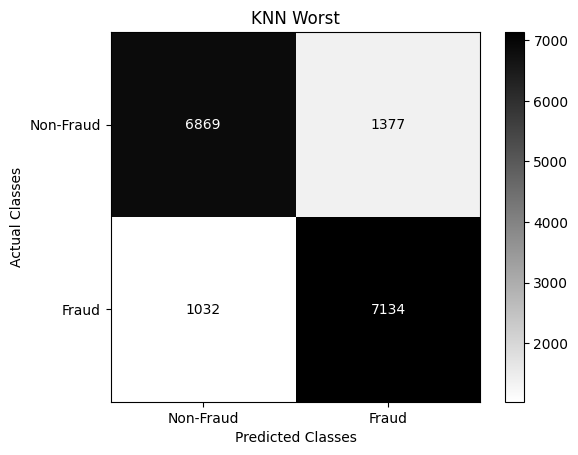

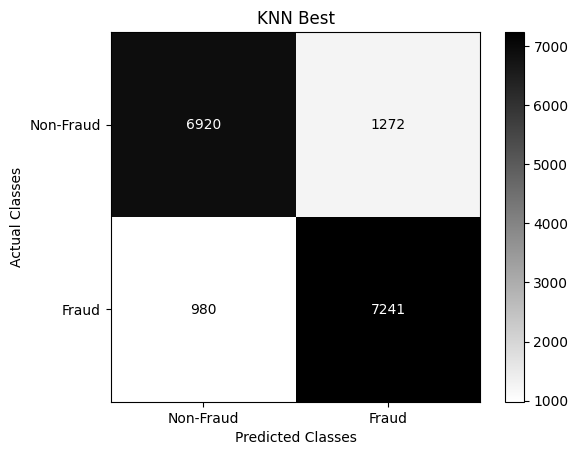

In [66]:
print("Model Name: KNN Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
knn_cm_worst.plot(title="KNN Worst", number_label=True)
knn_cm_best.plot(title="KNN Best", number_label=True)
plt.show()

In [68]:
import shap

subset_size = 1000 

# Randomly select a subset 
subset_indices = np.random.choice(X.shape[0], subset_size, replace=False)
X_subset = X.iloc[subset_indices]
y_subset = y.iloc[subset_indices]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
knn_model.fit(X_scaled, y)

# Calculate Shapley values
explainer = shap.KernelExplainer(knn_model.predict, shap.sample(X_scaled, 20))
shap_values = explainer.shap_values(X_subset)

  0%|          | 0/1000 [00:00<?, ?it/s]

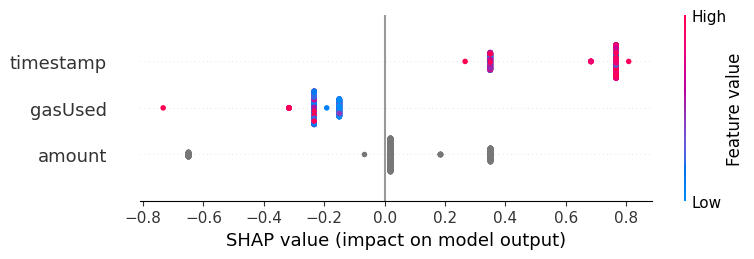

In [73]:
import shap
import matplotlib.pyplot as plt

feature_names = X.columns
# Summary Plot for Feature Importance
shap.summary_plot(shap_values, X_subset, feature_names=feature_names)
plt.show()


In [72]:
feature_indices = [0, 1, 2]

for feature_index in feature_indices:
    feature_name = feature_names[feature_index]

    feature_shap_values = shap_values[:, feature_index]

    positive_impact_count = sum(feature_shap_values > 0)
    negative_impact_count = sum(feature_shap_values < 0)

    print(f"Feature: {feature_name}")
    print(f"Number of Samples with Positive Impact: {positive_impact_count}")
    print(f"Number of Samples with Negative Impact: {negative_impact_count}")

Feature: timestamp
Number of Samples with Positive Impact: 1000
Number of Samples with Negative Impact: 0
Feature: amount
Number of Samples with Positive Impact: 913
Number of Samples with Negative Impact: 87
Feature: gasUsed
Number of Samples with Positive Impact: 0
Number of Samples with Negative Impact: 1000


In [56]:
#Random forest model
rf_params = {"n_estimators": 150, "criterion": "entropy", "bootstrap": True}

rf_model = RandomForestClassifier(**rf_params)
# rf_model.fit(X, y)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
rf_cm_worst = None
rf_cm_best = None
rf_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    rf_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = rf_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    rf_cm_list.append(cm)
    if rf_cm_worst is None:
        rf_cm_worst = cm
    else:
        if cm.Overall_ACC < rf_cm_worst.Overall_ACC:
            rf_cm_worst = cm

    if rf_cm_best is None:
        rf_cm_best = cm
    else:
        if cm.Overall_ACC > rf_cm_best.Overall_ACC:
            rf_cm_best = cm

Model Name: Random Forest Classifier

10-Fold Metrics: 

Accuracy : 0.95

F1 : 0.96

Kappa : 0.91

Precision : 0.93

Recall : 0.99



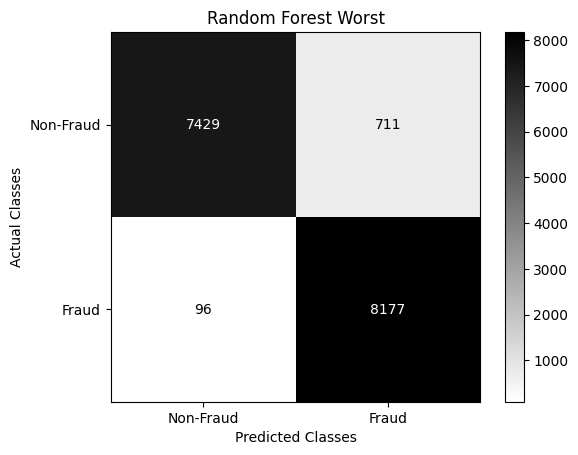

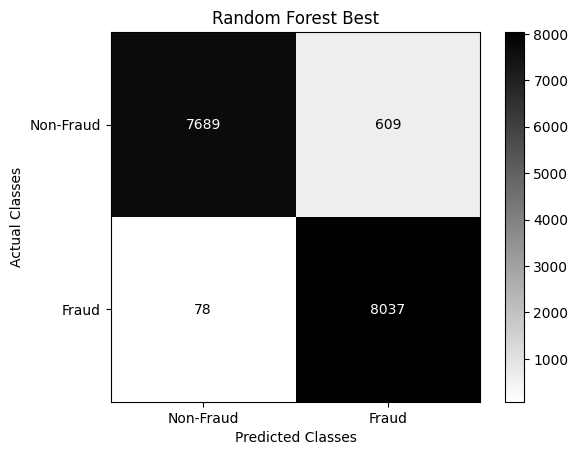

In [57]:
print("Model Name: Random Forest Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
rf_cm_worst.plot(title="Random Forest Worst", number_label=True)
rf_cm_best.plot(title="Random Forest Best", number_label=True)
plt.show()

In [58]:
#feature importance
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

timestamp    0.557750
gasUsed      0.334828
amount       0.107422
dtype: float64

In [62]:
#tuned RF model with AUROC score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Define RANDOM_STATE
RANDOM_STATE = 42

# Define hyperparameter grid for the Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)
best_rf_params = grid_search.best_params_
tuned_rf_model = RandomForestClassifier(**best_rf_params)

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
cm_metric_list = []
rf_cm_worst = None
rf_cm_best = None
rf_cm_list = []
auroc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    tuned_rf_model.fit(X_train, y_train)
    cm = ConfusionMatrix(
        actual_vector=y_test.values, predict_vector=tuned_rf_model.predict(X_test)
    )
    cm_metric_list.append(
        {
            "Accuracy": cm.Overall_ACC,
            "F1": cm.F1[1],
            "Kappa": cm.Kappa,
            "Precision": cm.PPV[1],
            "Recall": cm.TPR[1],
        }
    )
    cm.relabel({1: "Fraud", 0: "Non-Fraud"})
    rf_cm_list.append(cm)

    if rf_cm_worst is None:
        rf_cm_worst = cm
    else:
        if cm.Overall_ACC < rf_cm_worst.Overall_ACC:
            rf_cm_worst = cm

    if rf_cm_best is None:
        rf_cm_best = cm
    else:
        if cm.Overall_ACC > rf_cm_best.Overall_ACC:
            rf_cm_best = cm
    
    # Calculate AUROC
    y_scores = tuned_rf_model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_scores)
    auroc_scores.append(auroc)

mean_auroc = np.mean(auroc_scores)
print("Mean AUROC:", mean_auroc)

Mean AUROC: 0.9879989682290647


Model Name: Tuned Random Forest Classifier

10-Fold Metrics: 

Accuracy : 0.96

F1 : 0.96

Kappa : 0.92

Precision : 0.93

Recall : 0.99



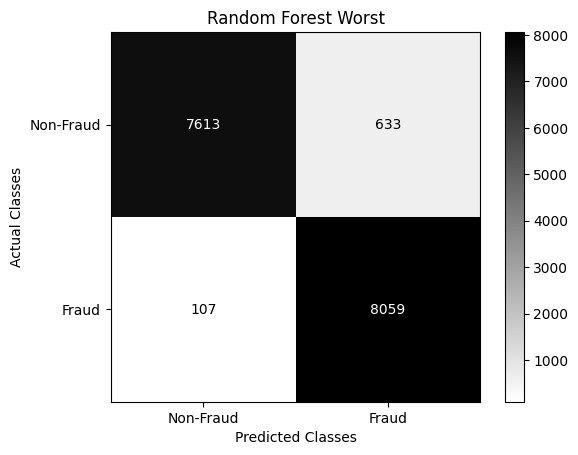

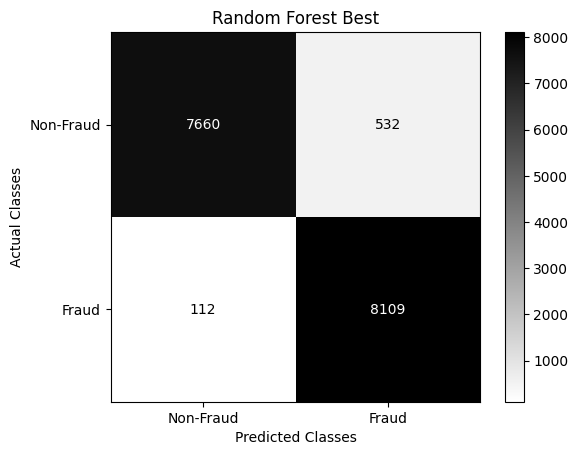

In [63]:
#metrics for tuned rf model
print("Model Name: Tuned Random Forest Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
rf_cm_worst.plot(title="Random Forest Worst", number_label=True)
rf_cm_best.plot(title="Random Forest Best", number_label=True)
plt.show()

In [64]:
#feature importance for tuned RF model

pd.Series(tuned_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

timestamp    0.568186
gasUsed      0.330837
amount       0.100977
dtype: float64

In [59]:
# Neural network model

nn_params = {"hidden_layer_sizes": (100, 50), "solver": "adam"}

nn_model = MLPClassifier(**nn_params)
# nn_model.fit(X, y)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    nn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = nn_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    nn_cm_list.append(cm)
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Model Name: Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.81

F1 : 0.81

Kappa : 0.62

Precision : 0.82

Recall : 0.8



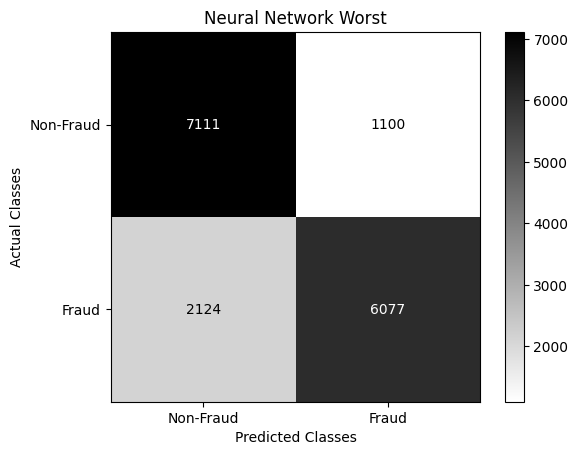

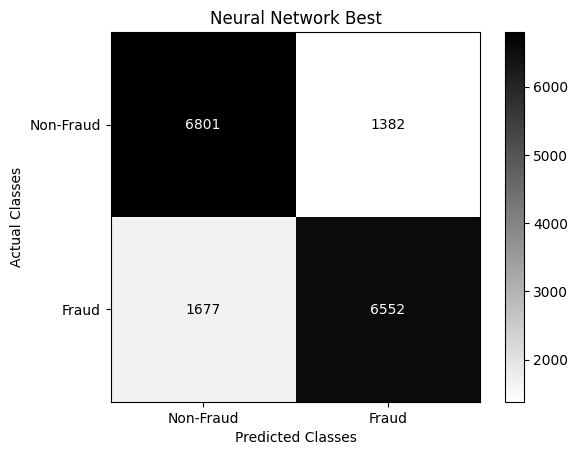

In [60]:
print("Model Name: Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()

In [74]:
#tuned NN model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


RANDOM_STATE = 42
param_grid = {
    'hidden_layer_sizes': [(100, 100), (50, 50), (100, 50)],
    'solver': ['adam', 'lbfgs'],  
}


grid_search = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True),
    scoring='accuracy',  
    n_jobs=-1  
)


scaler = StandardScaler()
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    grid_search.fit(X_train, y_train)
    best_nn_params = grid_search.best_params_
    tuned_nn_model = MLPClassifier(**best_nn_params)
    tuned_nn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector=y_test.values, predict_vector=tuned_nn_model.predict(X_test))
    cm_metric_list.append({
        "Accuracy": cm.Overall_ACC,
        "F1": cm.F1[1],
        "Kappa": cm.Kappa,
        "Precision": cm.PPV[1],
        "Recall": cm.TPR[1]
    })
    cm.relabel({1: "Fraud", 0: "Non-Fraud"})
    nn_cm_list.append(cm)
    
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Training interrupted by user.
Training interrupted by user.


Model Name: Tuned Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.86

F1 : 0.87

Kappa : 0.71

Precision : 0.82

Recall : 0.92



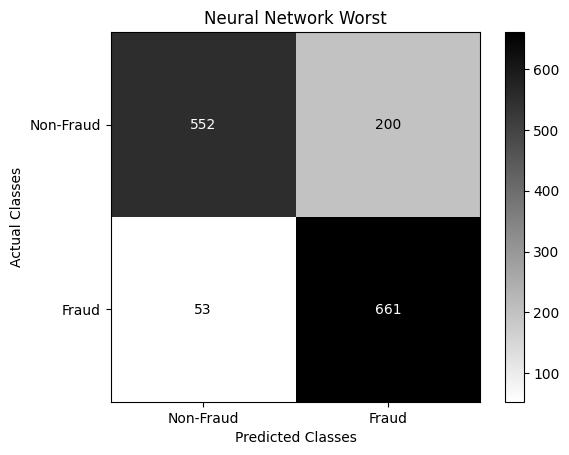

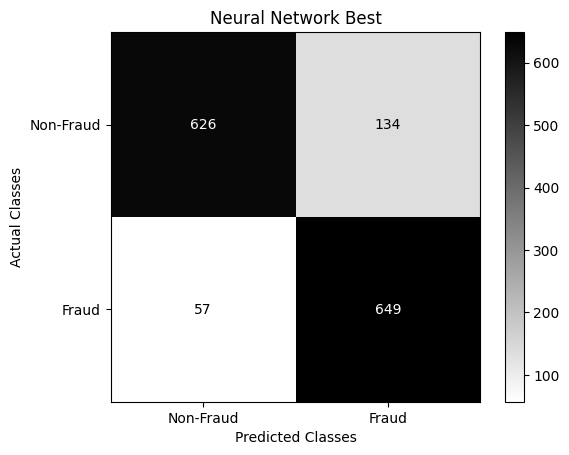

In [32]:
#metrics for tuned model
print("Model Name: Tuned Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()

In [32]:
#Ranking the three models

rf_combined_cm = None
nn_combined_cm = None
knn_combined_cm = None
for index, cm in enumerate(rf_cm_list):
    if rf_combined_cm is None:
        rf_combined_cm = cm
    else:
        rf_combined_cm = rf_combined_cm.combine(cm)
    
    if nn_combined_cm is None:
        nn_combined_cm = nn_cm_list[index]
    else:
        nn_combined_cm = nn_combined_cm.combine(nn_cm_list[index])
    
    if knn_combined_cm is None:
        knn_combined_cm = knn_cm_list[index]
    else:
        knn_combined_cm = knn_combined_cm.combine(knn_cm_list[index])

In [33]:
cp = Compare({"Random Forest":rf_combined_cm, "Neural Network":nn_combined_cm, "KNN":knn_combined_cm})
print(cp)

Best : Random Forest

Rank   Name              Class-Score       Overall-Score
1      Random Forest     0.84167           0.92381
2      KNN               0.725             0.78095
3      Neural Network    0.68333           0.78095

